<a href="https://colab.research.google.com/github/Miftahulza/PCDdomainfrekuensi_F55122009_MIFTAHUL-ZANNAH/blob/main/PCDdomainfrekuensi_F55122009_MIFTAHUL_ZANNAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy scipy matplotlib opencv-python

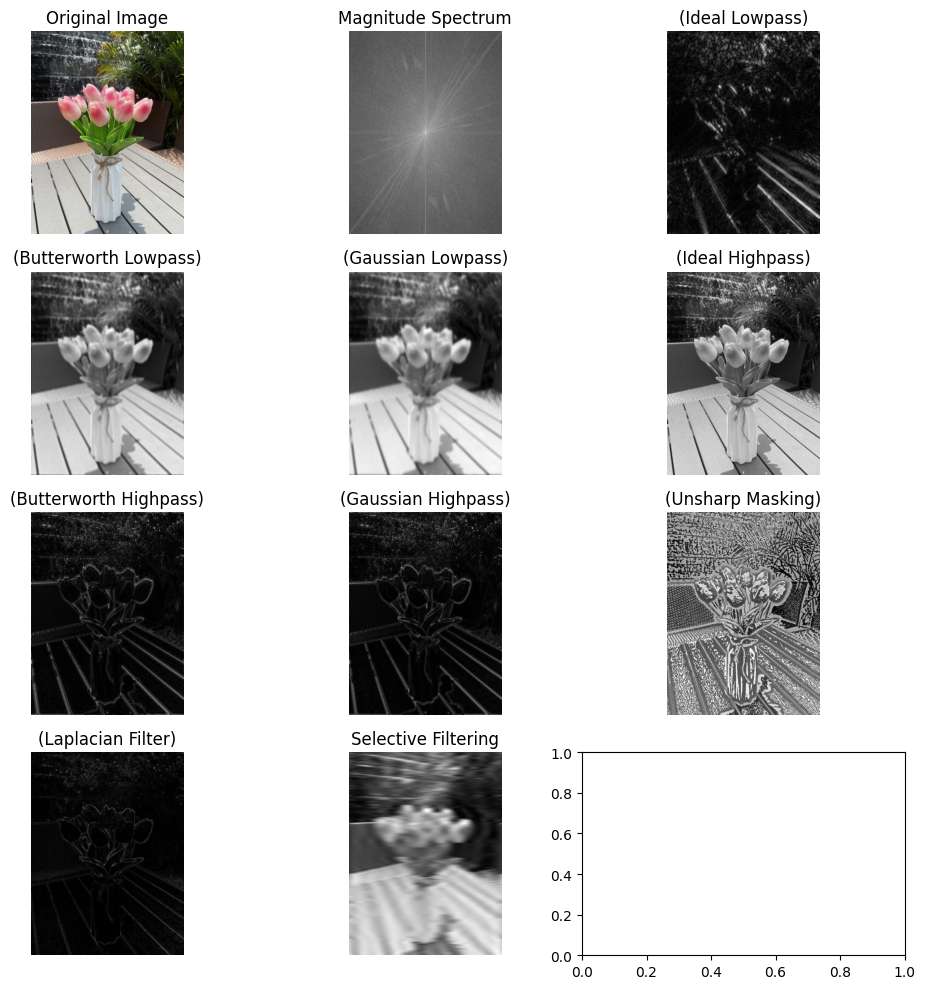

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from scipy.signal import butter
from scipy.ndimage import gaussian_filter
# Membaca dan menampilkan gambar dalam warna asli
img_color = cv2.imread('/content/drive/MyDrive/GAMBARPCD/WhatsApp Image 2024-03-27 at 07.41.31_bbbc570b.jpg')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
# FFT dan DFT pada gambar grayscale
fft_image = fft2(img_gray)  # Fast Fourier Transform
dft_image = fftshift(fft_image)  # Shift untuk menampilkan frekuensi tengah
# Menampilkan magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(dft_image))
# Ideal Lowpass Filter
def ideal_lowpass_filter(shape, cutoff):
    mask = np.zeros(shape)
    center = (shape[0] // 2, shape[1] // 2)
    cv2.circle(mask, center, cutoff, 1, -1)
    return mask
lowpass_filter = ideal_lowpass_filter(dft_image.shape, 50)
lowpassed_image = dft_image * lowpass_filter
reconstructed_image_lowpass = np.abs(ifft2(ifftshift(lowpassed_image)))
# Butterworth Lowpass Filter
def create_butterworth_lowpass_filter(shape, cutoff, order=2):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    x, y = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    mask = 1 / (1 + (distance / cutoff) ** (2 * order))
    return mask
butterworth_lowpass_filter = create_butterworth_lowpass_filter(dft_image.shape, 50)
filtered_image = dft_image * butterworth_lowpass_filter
reconstructed_image_butterworth = np.abs(ifft2(ifftshift(filtered_image)))
# Gaussian Lowpass Filter
def create_gaussian_lowpass_filter(shape, sigma):
    rows, cols = shape
    x, y = np.ogrid[:rows, :cols]
    center = (rows // 2, cols // 2)
    distance = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
    mask = np.exp(- (distance**2) / (2 * sigma**2))
    return mask
gaussian_lowpass_filter = create_gaussian_lowpass_filter(dft_image.shape, 30)
filtered_image = dft_image * gaussian_lowpass_filter
reconstructed_image_gaussian = np.abs(ifft2(ifftshift(filtered_image)))
# Ideal Highpass Filter
def ideal_highpass_filter(shape, cutoff):
    mask = np.ones(shape)
    center = (shape[0] // 2, shape[1] // 2)
    cv2.circle(mask, center, cutoff, 0, -1)
    return mask
highpass_filter = ideal_highpass_filter(dft_image.shape, 30)
highpassed_image = dft_image * highpass_filter
reconstructed_image_highpass = np.abs(ifft2(ifftshift(highpassed_image)))
# Butterworth Highpass Filter
butterworth_highpass_filter = create_butterworth_lowpass_filter(dft_image.shape, 30, order=2)
highpassed_image = dft_image * (1 - butterworth_highpass_filter)
reconstructed_image_butterworth_hp = np.abs(ifft2(ifftshift(highpassed_image)))
# Gaussian Highpass Filter
gaussian_highpass_filter = create_gaussian_lowpass_filter(dft_image.shape, 30)
highpassed_image = dft_image * (1 - gaussian_highpass_filter)
reconstructed_image_gaussian_hp = np.abs(ifft2(ifftshift(highpassed_image)))
# Filter Unsharp Masking
blurred = gaussian_filter(img_gray, sigma=5)
mask = img_gray - blurred
sharpened_image = img_gray + 1.5 * mask
# Laplacian Filter
laplacian_filter = cv2.Laplacian(img_gray, cv2.CV_64F)
reconstructed_image_laplacian = np.abs(laplacian_filter)
# Selective Filtering
selective_filter = np.zeros(dft_image.shape)
center = (dft_image.shape[0] // 2, dft_image.shape[1] // 2)
selective_filter[:, center[1] - 10: center[1] + 10] = 1
filtered_image = dft_image * selective_filter
reconstructed_image_selective = np.abs(ifft2(ifftshift(filtered_image)))
# Membuat subplots untuk menampilkan seluruh operasi dalam satu tampilan
fig, axs = plt.subplots(4, 3, figsize=(10, 10))  # 4 baris x 3 kolom
# Gambar asli
axs[0, 0].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis("off")
# Magnitude Spectrum
axs[0, 1].imshow(magnitude_spectrum, cmap='gray')
axs[0, 1].set_title('Magnitude Spectrum')
axs[0, 1].axis("off")
# Ideal Lowpass
axs[0, 2].imshow(reconstructed_image_lowpass, cmap='gray')
axs[0, 2].set_title('(Ideal Lowpass)')
axs[0, 2].axis("off")
# Butterworth Lowpass
axs[1, 0].imshow(reconstructed_image_butterworth, cmap='gray')
axs[1, 0].set_title('(Butterworth Lowpass)')
axs[1, 0].axis("off")
# Gaussian Lowpass
axs[1, 1].imshow(reconstructed_image_gaussian, cmap='gray')
axs[1, 1].set_title('(Gaussian Lowpass)')
axs[1, 1].axis("off")
# Ideal Highpass
axs[1, 2].imshow(reconstructed_image_highpass, cmap='gray')
axs[1, 2].set_title('(Ideal Highpass)')
axs[1, 2].axis("off")
# Butterworth Highpass
axs[2, 0].imshow(reconstructed_image_butterworth_hp, cmap='gray')
axs[2, 0].set_title('(Butterworth Highpass)')
axs[2, 0].axis("off")
# Gaussian Highpass
axs[2, 1].imshow(reconstructed_image_gaussian_hp, cmap='gray')
axs[2, 1].set_title('(Gaussian Highpass)')
axs[2, 1].axis("off")
# Unsharp Masking
axs[2, 2].imshow(sharpened_image, cmap='gray')
axs[2, 2].set_title('(Unsharp Masking)')
axs[2, 2].axis("off")
# Laplacian Filter
axs[3, 0].imshow(reconstructed_image_laplacian, cmap='gray')
axs[3, 0].set_title('(Laplacian Filter)')
axs[3, 0].axis("off")
# Selective Filtering
axs[3, 1].imshow(reconstructed_image_selective, cmap='gray')
axs[3, 1].set_title('Selective Filtering')
axs[3, 1].axis("off")
plt.tight_layout()
plt.show()